In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<hr style="border-width:2px; border-color:coral"/>
# 2d plotting in Python
<hr style="border-width:2px; border-color:coral"/>

For the next homework assignment, you will be asked to create 2d plots.  We will use a pseudo color plot, which you can think of as
a grid of colored squares. For example, consider the following 

<IPython.core.display.Javascript object>


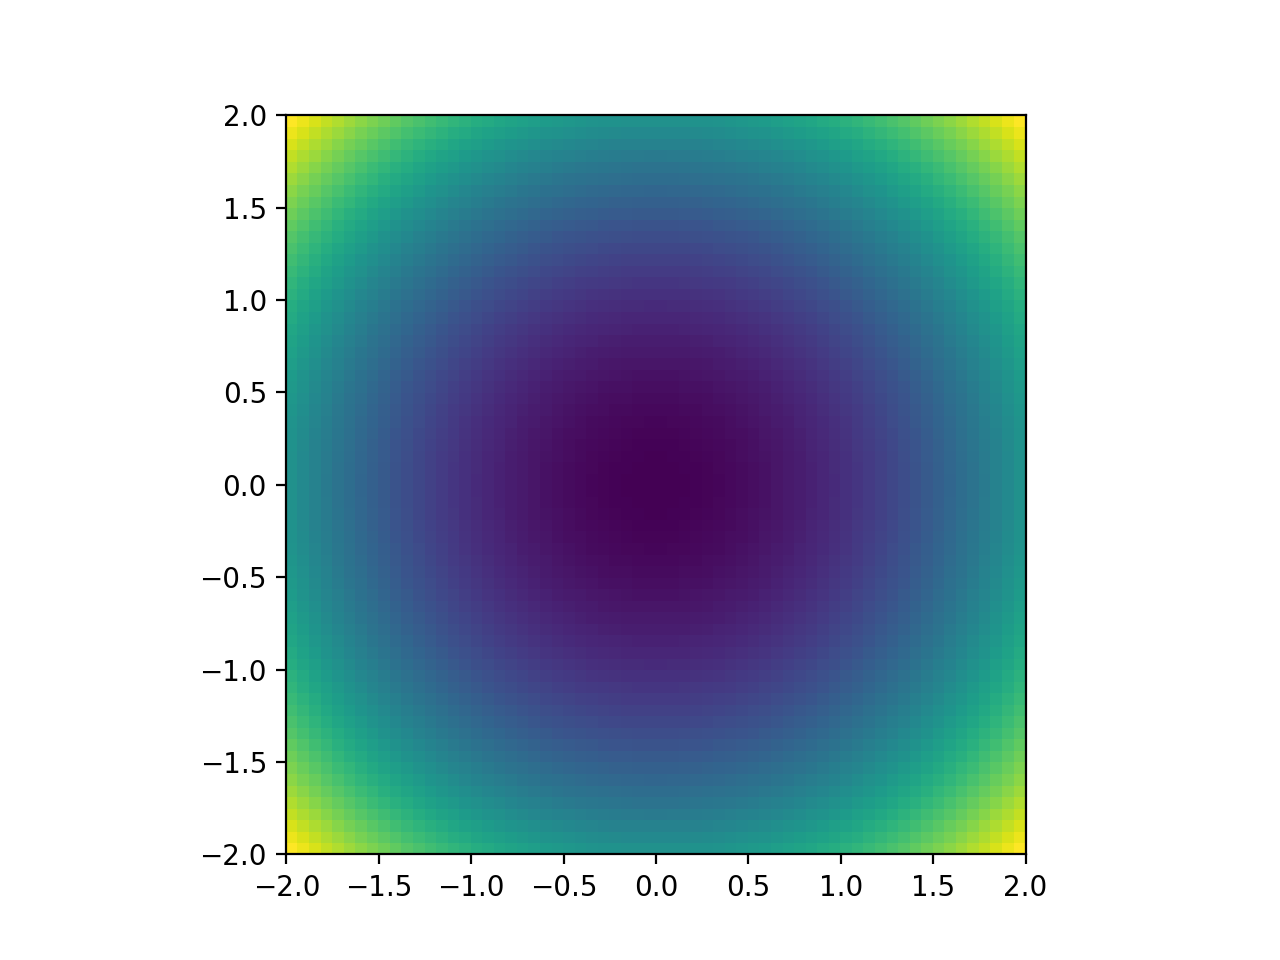

In [2]:
# generate 2 2d grids for the x & y bounds
ax = -2
bx = 2
ay = -2
by = 2
N = 64
dx = (bx-ax)/N
dy = (by-ay)/N
xe = np.linspace(ax,bx,N+1)
ye = np.linspace(ay,by,N+1)
xc = xe[:-1] + dx/2
yc = ye[:-1] + dy/2
xem, yem = np.meshgrid(xe,ye)

xcm, ycm = np.meshgrid(xc,yc)
zcm = xcm**2 + ycm**2

plt.figure(1)
plt.pcolor(xem, yem, zcm)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.axis('square')

plt.show()

## Reading data from a binary file

Time reading and plotting separately.  

In [12]:
%%time

import numpy as np
f = open("bin2d.out","rb")

# Open file and read  meta data with specified type (no padding needed)
dt = np.dtype([('ax','d'),('bx','d'),('ay','d'),('by','d'),
               ('mx','int32'),('my','int32'),('L','int32'),('m','int32')])
ax,ay,bx,by,mx,my,L,m = np.fromfile(f,dtype=dt,count=1)[0]

# Read in solution
u = np.fromfile(f,dtype='d')
u = np.reshape(u,(mx,my))

CPU times: user 603 µs, sys: 1.69 ms, total: 2.29 ms
Wall time: 1.18 ms


## Plotting 

<IPython.core.display.Javascript object>


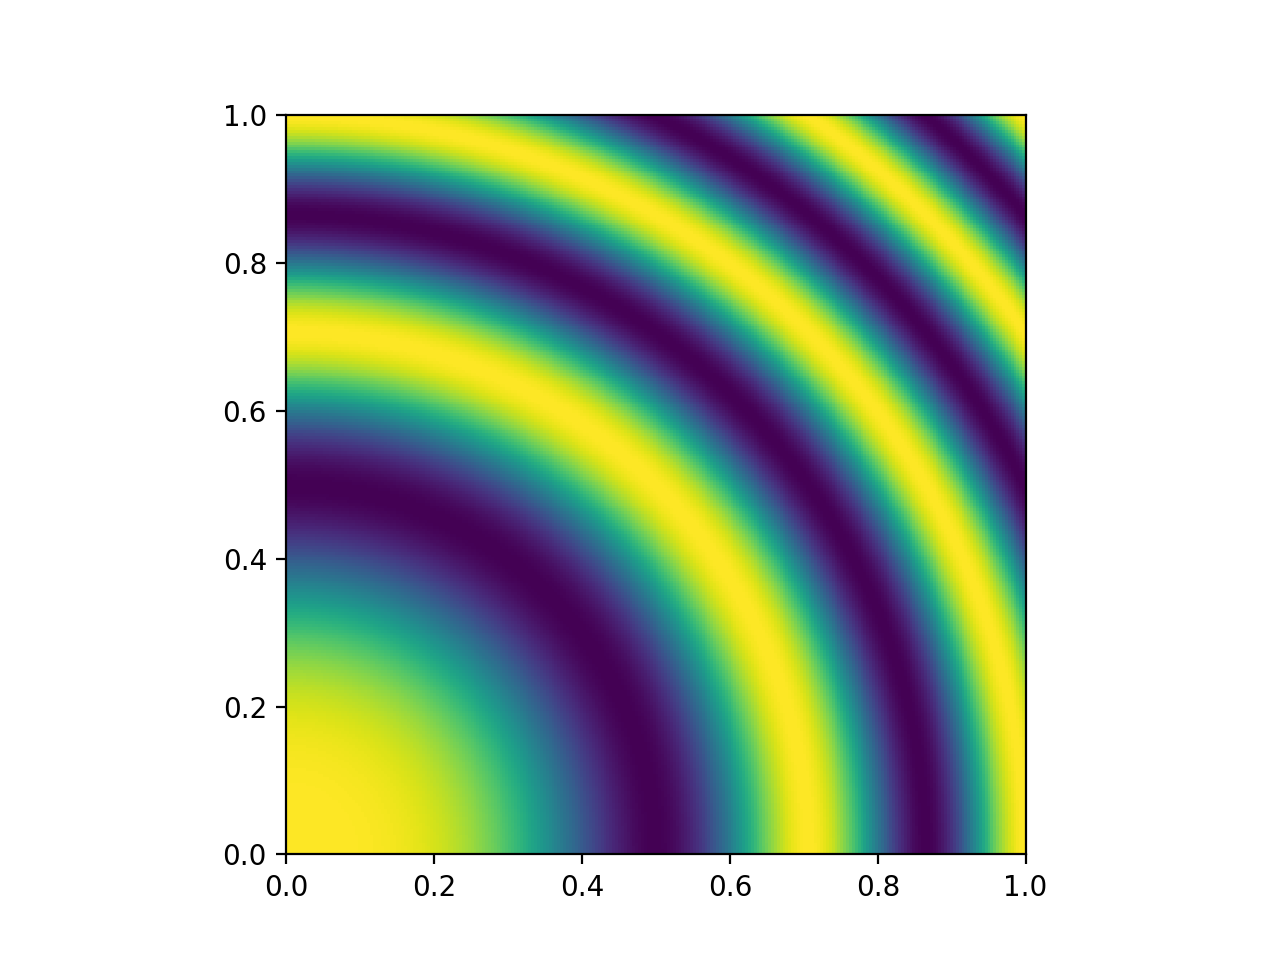

CPU times: user 1.2 s, sys: 32.4 ms, total: 1.23 s
Wall time: 1.23 s


In [13]:
%%time 
# Set up plotting
dx = (bx-ax)/mx
dy = (by-ay)/my
xe = np.linspace(ax,bx,mx+1)
ye = np.linspace(ay,by,my+1)
xc = xe[:-1] + dx/2
yc = ye[:-1] + dy/2
xem, yem = np.meshgrid(xe,ye)
xcm, ycm = np.meshgrid(xc,yc)


plt.figure(2)
plt.pcolor(xem, yem, u)
plt.xlim([ax,bx])
plt.ylim([ay,by])
plt.axis('square')

plt.show()

In [ ]:
u[8,8]

In [ ]:
u.shape

In [ ]:
pwd